# **1. Persiapan Dataset**

**1. Import Library**

In [1]:
# Memasukan Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Kamal
[nltk_data]     Sholihin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Kamal
[nltk_data]     Sholihin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**2. Import Dataset**

In [3]:
# Memasukan Dataset
data = pd.read_csv('Dataset_Berita.csv')
data.head(5)

,headline,date,link,content,label
0,[SALAH] Hanya Gibran yang Memakai Microphone y...,"Januari 4, 2024",https://turnbackhoax.id/2024/01/04/salah-hanya...,Hasil Periksa Fakta Luthfiyah OJ (UIN Raden Ma...,0
1,[SALAH] Video Jokowi Menyaksikan Debat Cawapres,"Januari 3, 2024",https://turnbackhoax.id/2024/01/03/salah-video...,Hasil periksa fakta Dyah FebriyaniVideo terseb...,0
2,[SALAH] “Cadas pangeran longsor baru saja keja...,"Januari 3, 2024",https://turnbackhoax.id/2024/01/03/salah-cadas...,"MENYESATKAN, mengeksploitasi peristiwa yang se...",0
3,[SALAH] Najwa Shihab Diteror Usai Komentari Vi...,"Januari 2, 2024",https://turnbackhoax.id/2024/01/02/salah-najwa...,Hasil periksa fakta ‘Ainayya Al Fatikhah.Ungga...,0
4,[SALAH] Ombak Mirip Tsunami Sapu Bersih Tempat...,"Januari 2, 2024",https://turnbackhoax.id/2024/01/02/salah-ombak...,Hasil periksa fakta ‘Ainayya Al Fatikhah.Ungga...,0


**3. Mengambil data yg di butuh kan untuk preprocessing**

In [4]:
# Mengambil data yg di butuh kan untuk preprocessing
df = pd.DataFrame(data[['content','label']]);

**4. Mengecek Tabel**

In [5]:
# mengecek jumlah kolom dan baris
print('Jumlah kolom dan baris\t\t : ')
print(df.shape,'\n')

# mengecek jumlah Berita salah(0) dan Berita Benar(1)
print('Jumlah berita salah dan benar\t : ')
print(df['label'].value_counts(),'\n')

# mengecek jumlah Data yg kosong
print('Jumlah data yg kosong\t\t : ')
print(df.isnull().sum())

Jumlah kolom dan baris		 : 
(2075, 2) 

Jumlah berita salah dan benar	 : 
label
1    1038
0    1037
Name: count, dtype: int64 

Jumlah data yg kosong		 : 
content    0
label      0
dtype: int64


**5. visualisasi perbandingan Dataset salah dan benar**

Text(0.5, 1.0, 'Dataset label distribuition')

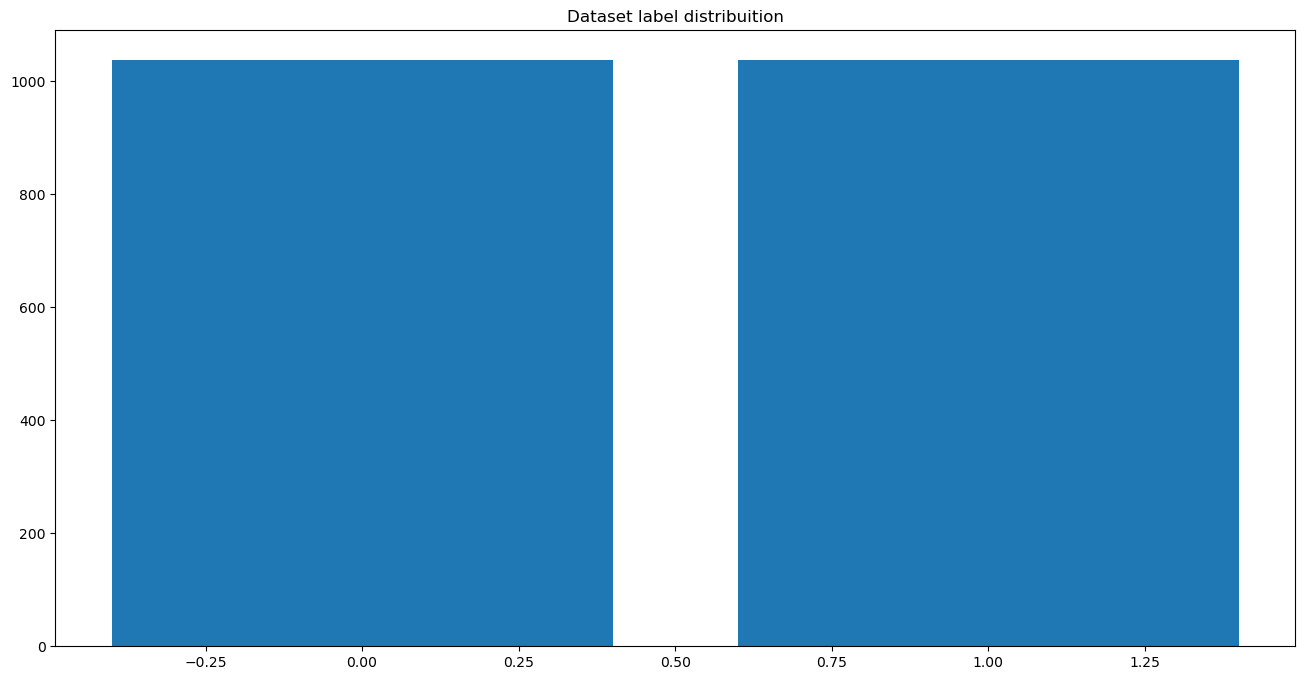

In [6]:
# Visualisasi jumlah label untuk keseimbangan
from collections import Counter

label_cnt = Counter(df.label)
plt.figure(figsize =(16,8))
plt.bar(label_cnt.keys(),label_cnt.values())
plt.title('Dataset label distribuition')

# **2. Teks Preprocessing**

**1. CaseFolding**

In [7]:
import re

# Membuat Fungsi CaseFolding
def casefolding(text):
  text = text.lower()                                   # Mengubah huruf kecil
  text = re.sub(r'https?://\S+|www\.\s+', ' ', text)    # Menghapus hyperlinks
  text = re.sub(r',',' ',text)                          # Menghapus koma
  text = re.sub(r'[-+]?[0-9]+', ' ', text)              # Menghapus angka
  text = re.sub(r'[^\w\s]', ' ', text)                  # Menghapus semua karakter yg bukan huruf dan spasi
  text = text.strip()                                   # menghapus spasi berlebih dan karakter
  return text

**2. Normalisasi Teks**

In [8]:
key_norm = pd.read_csv('key_norm.csv')

# Membuat Fungsi Normalisasi Teks
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
  if (key_norm['singkat'] == word).any()
  else word for word in text.split()
  ])

  text = str.lower(text)
  return text

**3. Filtering(Stopword Removal)**

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopwords_indonesia = stopwords.words('indonesian')

# Membuat fungsi Stopword Removal
more_stopword = []
stopwords_indonesia = stopwords_indonesia + more_stopword

def remove_stopword(text):
  clean_words = []
  words = word_tokenize(text)
  for word in words:
    if word not in stopwords_indonesia:
      clean_words.append(word)
  return " ".join(clean_words)

**4. Stemming**

In [10]:
# Menginstall Sastrawi
!pip -q install sastrawi

In [11]:
# Merubah Kata menjadi Kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat Fungsi untuk Stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [12]:
# Melakukan Percobaan pada fungsi Preprocessing
Raw_data = df['content'].iloc[2]
case_folding = casefolding(Raw_data)
teks_normal = text_normalize(case_folding)
stopword = remove_stopword(teks_normal)
text_stemming = stemming(stopword)

print('Data Mentah\t : ', Raw_data)
print('Case Folding\t : ', case_folding)
print('Teks Normatlize\t : ', teks_normal)
print('Stopword\t : ', stopword)
print('Stemming\t : ', text_stemming)

Data Mentah	 :  MENYESATKAN, mengeksploitasi peristiwa yang sedang terjadi (trending). FAKTA: video yang dibagikan BUKAN rekaman peristiwa saat ini (2024), sudah beredar sebelumnya pada tahun lalu (2023) berkaitan dengan peristiwa yang terjadi pada tahun sebelumnya (2022).Selengkapnya di bagian  dan REFERENSI.KATEGORI: Konten yang Menyesatkan.SUMBER: Facebook, https://archive.md/MqO6w (arsip cadangan). “Cadas pangeran longsor baru saja kejadiannya”.Berdasarkan 7 Jenis Mis- dan Disinformasi oleh First Draft News, termasuk “Konten yang Menyesatkan: Penggunaan informasi yang sesat untuk membingkai sebuah isu atau individu” [1]SUMBER membagikan video dengan menambahkan klaim yang mengeksploitasi peristiwa yang sedang terjadi (trending) yang menyebabkan kesimpulan MENYESATKAN. FAKTA: video yang dibagikan BUKAN rekaman peristiwa saat ini (2024), sudah beredar sebelumnya pada tahun lalu (2023) berkaitan dengan peristiwa yang terjadi pada tahun sebelumnya (2022). Verifikasi VideoSalah satu sum

**5. Text Processing Pipeline**

In [13]:
# Membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopword(text)
  text = stemming(text)
  return text

In [14]:
# Eksekusi fungsi preprocessing
df['clean_text'] = df['content'].apply(text_preprocessing)

In [15]:
# Memasukan data kedalam file csv
df.to_csv('clean_data.csv')

# **3. Feature Engineering**

In [16]:
# Pisahkan kolom feature dan target
x = df['clean_text']
y = df['label']

**1. Feature Extraction(Tf-Idf & N-Gram)**

In [17]:
# Save Model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)

x_tf_idf = vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_, open('Feature_tf-idf.sav', 'wb'))

In [18]:
# Menampilkan Vocabulary dari tf-idf
vec_TF_IDF.vocabulary_

{'hasil': 5643,
 'periksa': 11819,
 'fakta': 4483,
 'luthfiyah': 8970,
 'oj': 11019,
 'uin': 16548,
 'raden': 12700,
 'mas': 9359,
 'said': 13596,
 'surakarta': 15266,
 'klaim': 7832,
 'gibran': 5175,
 'pakai': 11268,
 'microphone': 9868,
 'pegang': 11640,
 'debat': 3257,
 'cawapres': 2621,
 'tiga': 16030,
 'mikrofon': 9889,
 'skin': 14629,
 'tone': 16202,
 'countryman': 2997,
 'clip': 2860,
 'on': 11071,
 'bodypack': 2141,
 'tangan': 15599,
 'whm': 17179,
 'lengkap': 8675,
 'jelas': 6829,
 'kategori': 7382,
 'konten': 8067,
 'sesat': 14258,
 'sumber': 15170,
 'tiktok': 16038,
 'microphine': 9867,
 'lekat': 8639,
 'dialihfungsikan': 3506,
 'alat': 402,
 'bantu': 1528,
 'dengarsilahkan': 3360,
 'teriak': 15881,
 'hoax': 5866,
 'akun': 373,
 'facebook': 4437,
 'roger': 13330,
 'silalahi': 14453,
 'official': 11003,
 'memposting': 9603,
 'gambar': 4900,
 'foto': 4779,
 'nomor': 10789,
 'postingan': 12220,
 'alih': 453,
 'fungsi': 4838,
 'dengar': 3359,
 'telusur': 15796,
 'banding': 1475,

In [19]:
# Melihat Jumlah Fitur
print(len(vec_TF_IDF.get_feature_names_out()))

17591


In [20]:
# Melihat Fitur yang ada didalam corpus
print(vec_TF_IDF.get_feature_names_out())

['aa' 'aaauuuu' 'aaauuuuu' ... 'zulkarnainsekretaris' 'zulkifli' 'zuyyina']


In [21]:
x1 = x_tf_idf.toarray()
data_tabular_tf_idf = pd.DataFrame(x1,columns = vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,aa,aaauuuu,aaauuuuu,aaib,aam,aamiiin,aamiin,aamin,aas,ab,...,zul,zuldhadril,zulfa,zulfikar,zulhadril,zulhas,zulhasril,zulkarnainsekretaris,zulkifli,zuyyina
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**2. Feature Selection**

In [22]:
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k = 3000)
x_kbest_features =chi2_features.fit_transform(x_train, y_train)

# untuk Reduce Feature
print('Original Feature Number', x_train.shape[1])
print('Reduce Feature Number', x_kbest_features.shape[1])

Original Feature Number 17591
Reduce Feature Number 3000


In [24]:
Data = pd.DataFrame(chi2_features.scores_, columns=['Nilai'])
Data

,Nilai
0,0.374795
1,0.069816
2,0.069816
3,0.213819
4,0.075914
...,...
17586,4.078373
17587,0.112443
17588,0.012945
17589,0.070599


In [25]:
# menampilkan Feature beserta nilainya
feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,0.374795,aa
1,0.069816,aaauuuu
2,0.069816,aaauuuuu
3,0.213819,aaib
4,0.075914,aam
...,...,...
17586,4.078373,zulhas
17587,0.112443,zulhasril
17588,0.012945,zulkarnainsekretaris
17589,0.070599,zulkifli


In [26]:
# Mengurutkan nilai Feature terbaik
Data.sort_values(by = 'Nilai', ascending = False)

,Nilai,Fitur
16872,6.149429e+01,video
8067,3.754656e+01,konten
16644,3.620494e+01,unggah
7832,3.427271e+01,klaim
373,3.268337e+01,akun
...,...,...
5549,5.775511e-07,handheld
11011,3.164221e-07,ogah
12621,1.520186e-07,putera
2899,1.405172e-08,colek


In [27]:
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [28]:
# menampilkan fitur yang terpilih berdasarkan nilai mask atau nilai tertinggi yg sudah di tetapkan chi square
new_feature=[]
for bool, f in zip(mask, feature):
  if bool :
    new_feature.append(f)
  selected_feature = new_feature
selected_feature

['aamiin',
 'ababil',
 'abadi',
 'abar',
 'abu',
 'abuya',
 'ac',
 'acak',
 'acara',
 'ace',
 'adegan',
 'aden',
 'adi',
 'adib',
 'adil',
 'adu',
 'advertising',
 'advokasi',
 'advokat',
 'adwan',
 'aedes',
 'aegypti',
 'aeon',
 'afif',
 'afiliasi',
 'afp',
 'africa',
 'afrika',
 'aga',
 'agam',
 'agama',
 'agenda',
 'agnes',
 'agu',
 'agung',
 'agus',
 'agustiar',
 'agustina',
 'agustus',
 'ahok',
 'ahy',
 'aibon',
 'aidil',
 'aidit',
 'aids',
 'aiman',
 'ainayya',
 'airlangga',
 'ajak',
 'ajang',
 'ajinomoto',
 'ajman',
 'akar',
 'akibat',
 'aklamasi',
 'akrab',
 'akronim',
 'aksi',
 'aktor',
 'aktual',
 'aku',
 'akun',
 'al',
 'alam',
 'alas',
 'alat',
 'alhamdulillah',
 'ali',
 'alir',
 'alissa',
 'aljazair',
 'alkohol',
 'allah',
 'almas',
 'aluminium',
 'alumni',
 'aman',
 'amanah',
 'amanat',
 'amazon',
 'ambar',
 'ambil',
 'ambrol',
 'ambulans',
 'america',
 'american',
 'amerika',
 'amichai',
 'amin',
 'aminuddin',
 'amnesti',
 'ampi',
 'amplop',
 'amran',
 'amuk',
 'amungkas

In [29]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
new_selected_feature = {}

for(k, v) in vec_TF_IDF.vocabulary_.items():
  if k in selected_feature :
    new_selected_feature[k]=v

new_selected_feature

{'hasil': 5643,
 'periksa': 11819,
 'fakta': 4483,
 'luthfiyah': 8970,
 'oj': 11019,
 'uin': 16548,
 'raden': 12700,
 'mas': 9359,
 'surakarta': 15266,
 'klaim': 7832,
 'gibran': 5175,
 'microphone': 9868,
 'pegang': 11640,
 'debat': 3257,
 'cawapres': 2621,
 'tiga': 16030,
 'on': 11071,
 'lengkap': 8675,
 'jelas': 6829,
 'kategori': 7382,
 'konten': 8067,
 'sesat': 14258,
 'sumber': 15170,
 'tiktok': 16038,
 'alat': 402,
 'akun': 373,
 'facebook': 4437,
 'official': 11003,
 'memposting': 9603,
 'gambar': 4900,
 'foto': 4779,
 'nomor': 10789,
 'postingan': 12220,
 'fungsi': 4838,
 'dengar': 3359,
 'telusur': 15796,
 'banding': 1475,
 'jumat': 7009,
 'desember': 3419,
 'cak': 2491,
 'imin': 6170,
 'mahfud': 9053,
 'video': 16872,
 'kanal': 7213,
 'youtube': 17450,
 'kompastv': 7962,
 'judul': 6991,
 'muhaimin': 10211,
 'md': 9476,
 'pilpres': 11989,
 'menit': 9706,
 'informasi': 6300,
 'stasiun': 14917,
 'televisi': 15786,
 'selenggara': 14046,
 'bawa': 1664,
 'tuju': 16416,
 'antisipas

In [30]:
len(new_selected_feature)

3000

In [31]:
pickle.dump(new_selected_feature, open('new_selected_feature_tf-idf.sav', 'wb'))

In [32]:
# menampilkan fitur-fitur yang sudah di seleksi
data_selected_feature = pd.DataFrame(x_kbest_features, columns = selected_feature)
data_selected_feature

,aamiin,ababil,abadi,abar,abu,abuya,ac,acak,acara,ace,...,zalim,zaman,zara,zaytun,zelenskyy,ziarah,zita,zon,zudan,zulhas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.060495,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095398,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **4. Modeling**

In [33]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**1. Import Library**

In [34]:
#import library
import random
from sklearn.model_selection import train_test_split

**2. train & test split**

In [35]:
x = selected_x
y = df.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [36]:
# Menampilkan jumlah data training dan jumlah data testing
print('Banyaknya x_train : ', len(x_train))
print('Banyaknya x_test : ', len(x_test))
print('Banyaknya y_train : ', len(y_train))
print('Banyaknya y_test : ', len(y_test))

Banyaknya x_train :  1660
Banyaknya x_test :  415
Banyaknya y_train :  1660
Banyaknya y_test :  415


**3. Menyiapkan fungsi untuk proses modeling**

In [37]:
# Membuat model prediksi
data_input = ('Unggahan video dengan klaim bahwa Gibran Rakabuming membalas hinaan yang dilontarkan oleh Megawati Soekarnoputri merupakan konten yang menyesatkan. Faktanya, video tersebut berasal dari dua peristiwa yang tidak saling berkaitan.[KATEGORI]: Konten yang Menyesatkan[NARASI]: “Gibran balas hinaan megawati!!! #jokowi #gibranrakabuming #prabowosubianto #allinprabowo”Akun TikTok Ruang Rakyat (https://www.tiktok.com/@ruang.rakyat) mengunggah video dengan klaim bahwa anak sulung Presiden Joko Widodo, Gibran Rakabuming Raka, membalas hinaan yang dilontarkan oleh Ketua Umum PDI Perjuangan, Megawati Soekarnoputri. Dalam unggahan ditampilkan pula video Megawati yang menyebut bahwa Jokowi tak bisa jadi presiden tanpa partainya.Setelah dilakukan penelusuran, faktanya isi video tersebut berasal dari dua peristiwa yang tidak saling berkaitan.Pertama, video Megawati yang menyebut bahwa Jokowi tidak bisa jadi presiden tanpa PDI-P nyatanya diambil dari pidato politiknya dalam acara HUT ke-50 PDI-P pada 10 Januari 2023. Ia mengatakan bahwa pada dasarnya, seseorang hanya bisa menjadi presiden melalui partai.Kedua, potongan video yang diklaim sebagai bukti bahwa Gibran membalas hinaan Megawati nyatanya diambil dari pidato politik yang ia ungkapkan di Gelora Bung Karno pada 25 Oktober 2023. Dalam pidato tersebut, Gibran membeberkan deretan program kerja yang telah ia susun bersama Prabowo sebagai pasangan Capres-Cawapres pada Pemilu 2024.Dengan demikian, informasi yang disebarluaskan oleh akun TikTok Ruang Rakyat merupakan informasi yang salah.')
data_input = text_preprocessing(data_input)

# load data
loaded_vec = TfidfVectorizer(decode_error='replace', vocabulary = set(pickle.load(open('new_selected_feature_tf-idf.sav', 'rb'))))

**4. Proses Modeling menggunakan algoritma Naive Bayes**

In [38]:
#import algoritma naive bayes
from sklearn.naive_bayes import MultinomialNB

# Proses Training menggunakan Naive Bayes
model_NB = MultinomialNB().fit(x_train, y_train)

In [39]:
hasil_NB = model_NB.predict(loaded_vec.fit_transform([data_input]))

if(hasil_NB == 0):
  h_NB = 'Fake News'
elif(hasil_NB == 1):
  h_NB = 'Real News'

print('Hasil Prediksi\t : ', h_NB)

Hasil Prediksi	 :  Fake News


In [40]:
# menyimpan Model
pickle.dump(model_NB, open('model_NB.sav', 'wb'))

**5. Proses Modeling menggunakan algoritma Support Vector Machine**

In [41]:
#import algoritma naive bayes
from sklearn.svm import SVC

# Proses Training menggunakan Naive Bayes
model_SVM = SVC().fit(x_train, y_train)

In [42]:
dense_data_input = loaded_vec.fit_transform([data_input]).toarray()

hasil_SVM = model_SVM.predict(dense_data_input)

if (hasil_SVM == 0):
    h_SVM = 'Fake News'
elif (hasil_SVM == 1):
    h_SVM = 'Real News'

print ('Hasil Prediksi\t : ', h_SVM)

Hasil Prediksi	 :  Fake News


In [43]:
# Menyimpan Model
pickle.dump(model_SVM, open('model_SVM.sav', 'wb'))

# **5. Evaluasi Model**

**1. Import Library**

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**2. Evaluasi Model Naive Bayes**

test time: 0.014s
accuracy: 0.992
              precision    recall  f1-score   support

     negatif       0.99      0.99      0.99       830
     positif       0.99      0.99      0.99       830

    accuracy                           0.99      1660
   macro avg       0.99      0.99      0.99      1660
weighted avg       0.99      0.99      0.99      1660



Text(0.5, 23.52222222222222, 'Label prediksi')

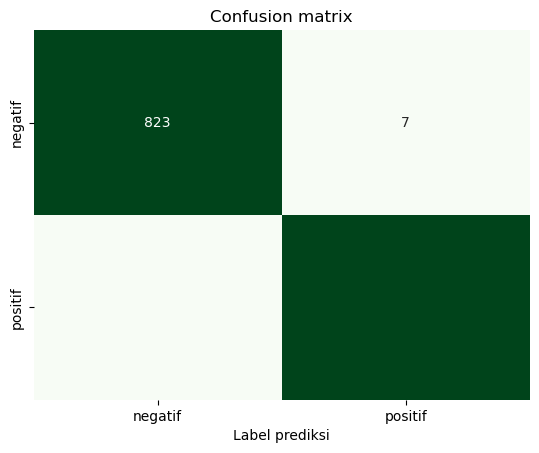

In [45]:
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay
from pandas import DataFrame

t = time()
predicted = model_NB.predict(x_train)

test_time = time() - t
print("test time: %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_train, predicted)
print("accuracy: %0.3f" % score1)
print(metrics.classification_report(y_train, predicted, target_names=['negatif','positif']))

columns = ['negatif','positif']
confm = confusion_matrix(y_train, predicted)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True, fmt='d', cbar=False)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')

In [46]:
from sklearn.model_selection import cross_val_score

# Menghitung skor cross-validation
cv_scores = cross_val_score(model_SVM, x_train, y_train, cv=10)  # cv=5 artinya menggunakan 5-fold cross-validation

# Mencetak skor cross-validation
print("Cross-Validation Scores:", cv_scores)

# Mencetak rata-rata skor cross-validation
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.9939759  0.98795181 1.         0.98795181 1.         0.98192771
 0.98192771 0.9939759  0.98192771 0.9939759 ]
Average Cross-Validation Score: 0.9903614457831326


**3. Evaluasi Model SVM**

*Cross Validation*

In [47]:
from sklearn.model_selection import cross_val_score

# Menghitung skor cross-validation
cv_scores = cross_val_score(model_SVM, x_train, y_train, cv=10)  # cv=5 artinya menggunakan 5-fold cross-validation

# Mencetak skor cross-validation
print("Cross-Validation Scores:", cv_scores)

# Mencetak rata-rata skor cross-validation
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.9939759  0.98795181 1.         0.98795181 1.         0.98192771
 0.98192771 0.9939759  0.98192771 0.9939759 ]
Average Cross-Validation Score: 0.9903614457831326


*Confusion Matrix*

test time: 4.711s
accuracy: 0.999
              precision    recall  f1-score   support

     negatif       1.00      1.00      1.00       830
     positif       1.00      1.00      1.00       830

    accuracy                           1.00      1660
   macro avg       1.00      1.00      1.00      1660
weighted avg       1.00      1.00      1.00      1660



Text(0.5, 23.52222222222222, 'Label prediksi')

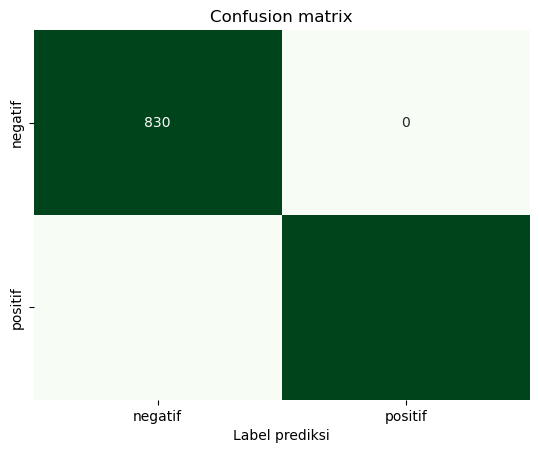

In [48]:
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay
from pandas import DataFrame

t = time()
predicted = model_SVM.predict(x_train)

test_time = time() - t
print("test time: %0.3fs" % test_time)

score1 = metrics.accuracy_score(y_train, predicted)
print("accuracy: %0.3f" % score1)
print(metrics.classification_report(y_train, predicted, target_names=['negatif','positif']))

columns = ['negatif','positif']
confm = confusion_matrix(y_train, predicted)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True, fmt='d', cbar=False)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')